# Titanic - Machine Learning from Disaster



Com o objetivo de aprimorar-me nos estudos de ML e DataScience. Este desafio é fornecido na plataforma Kaggle e o seu objetivo é conseguir identificar qual os passageiros que irão sobreviver, usando conceitos de aprendizagem de máquina. Para isto, são fornecidos dois datasets, um com o nome de __train.csv__, que consiste em dados para o treino do algoritmo para aprender como o dado se comportam. O dataset tem a seguinte estrutura:

Variable    |	Definition  |   Key
----------- |   ----------  |   ---
survival 	|   Survival 	|   0 = No, 1 = Yes
pclass 	    |   Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd
sex      	|   Sex         |    	
Age 	    |   Age in years 	
sibsp 	    |   # of siblings / spouses aboard the Titanic 	
parch 	    |   # of parents / children aboard the Titanic 	
ticket 	    |   Ticket number 	    |
fare 	    |   Passenger fare 	    |
cabin 	    |   Cabin number 	    |
embarked 	|   Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton

E também foi fornecido o dataset __test.csv__, que são os dados para o teste do algoritmo. Sua estrutura é a mesma que o do dataset anterior, porém sem a informação __survival__. Também foi fornecido o dataset __gender_submission.csv__, onde estão os dados verdadeiros para comparar os resultados do algorimo.

## Sumário

1. 

Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Lendo os csv's fornecidos para a análise

In [4]:
df_train = pd.read_csv("./datasets/train.csv")
df_test = pd.read_csv('./datasets/test.csv')
df_sub = pd.read_csv('./datasets/gender_submission.csv')

#### tratando os dados

visualizando os dados e realizando o tratamento necessário para a predição e visualização

* dados treinamentos

In [16]:
df_train.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [20]:
print(f"O tamanho de linhas e colunas deste dataframe é {df_train.shape}")

O tamanho de linhas e colunas deste dataframe é (891, 10)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Verificando e tratando dados faltantes

In [6]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

A coluna Cabin é importante para a gente?

In [26]:
df_train['Cabin'].isnull().sum()

687

In [27]:
print("A porcentagem de dados faltantes na coluna ""Cabin"" é %.2f%%" 
        % (len(df_train['Cabin'].isnull().sum()) / df_train['Cabin'].shape[0]))

TypeError: object of type 'numpy.int64' has no len()

In [18]:
# cabin
# df_train.drop(columns=['Cabin', 'Ticket'], inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

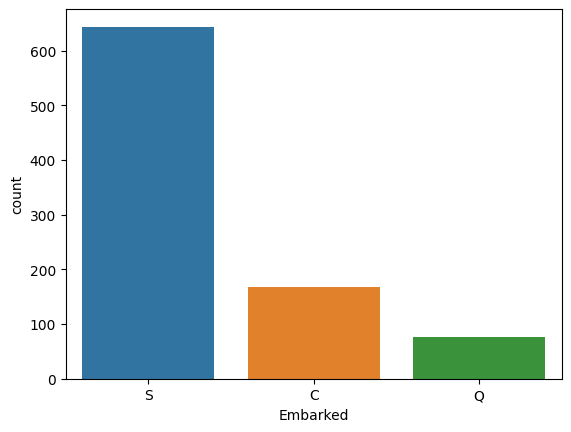

In [22]:
sns.countplot(data=df_train, x='Embarked')

In [ ]:
df_train['Embarked'].fillna()

In [23]:
# subistiui os valores nulos pelo valor que mais se repete, no caso S

df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].dropna().max())

In [24]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

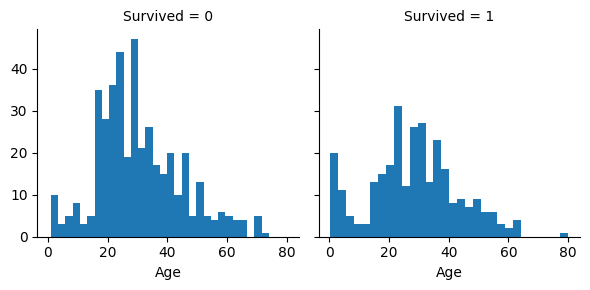

In [21]:
fig = sns.FacetGrid(df_train, col='Survived')
fig.map(plt.hist, 'Age', bins=30)